# Анализ оттока клиентов банка

Отделу маркетинга «Метанпромбанка» необходим анализ оттока клиентов. По результатам анализа нам нужно эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоточными и покрывали максимум проблемных зон банка, после чего дать рекомендации отделу маркетинга, чтобы воздействие на эти сегменты привело к уменьшению оттока.  

**Цели проекта:** 
1. Провести сегментацию отточных клиентов  
2. Дать рекомендации отделу маркетинга  

**Для достижения целей необходимо выполнить следующие задачи:**  
1. Ознакомиться с данными  
2. Провести предобработку данных  
3. Провести исследовательский анализ данных  
4. Выдвинуть и проверить статистические гипотезы  
5. На основе проведенного анализа провести сегментацию клиентов  
6. Дать рекомендации заказчику по каждому сегменту  
7. Подготовить презентацию  

**Описание данных:**  
/datasets/bank_scrooge.csv — датасет, содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  

Колонки:

+ *USERID* — идентификатор пользователя;  
+ *score* — баллы кредитного скоринга;  
+ *city* — город;  
+ *gender* — пол;  
+ *age* — возраст;  
+ *equity* — количество баллов собственности;  
+ *balance* — баланс на счете;  
+ *products* — количество продуктов, которыми пользуется клиент;  
+ *credit_card* — есть ли кредитная карта;  
+ *last_activity* — активный клиент;  
+ *EST_SALARY* — оценочный доход клиента;  
+ *churn* — признак оттока.  

**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{: .2f}'.format)

## Обзор данных

### Загрузка данных

In [2]:
#считаем файл с данными
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except: 
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### Общая информация

In [3]:
#выведем первые десять строк датафрейма с данными
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
5,202305,856.00,Рыбинск,М,56.00,4,863687.24,3,1,0,156619.80,0
6,177259,807.00,Ярославль,Ж,39.00,3,405042.44,3,0,1,103838.32,0
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
8,211686,923.00,Ярославль,М,54.00,5,1206337.87,2,1,0,155371.79,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0


In [4]:
#выведем общую информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Выводы

В полученном датафрейме 10 000 строк и 12 столбцов. Столбцы *age* и *balance* содержат пропуски. Типы данных в некоторых столбцах не соответствуют заданным значениям, в столбцах *score* и *age* должно быть целочисленное значение, в столбцах *credit_card, last_activity, churn* - булев тип. На данном этапе представлена информация по 10 000 клиентов. 

## Предобработка данных

### Унификация названий столбцов 

In [5]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:
#переименуем столбец с идентификатором пользователя
data = data.rename(columns={'userid': 'user_id'})

In [7]:
#проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Анализ и замена пропусков

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [9]:
pd.DataFrame(data.isna().mean()*100).round(1)

,0
user_id,0.00
score,0.00
city,0.00
gender,0.00
age,0.30
equity,0.00
balance,23.00
products,0.00
credit_card,0.00
last_activity,0.00


In [10]:
#создадим новый столбец, который будет повторять значения столбца 'баланс'
data['bal_miss'] = data['balance']
#заменим пропуски на -1
data['bal_miss'] = data['bal_miss'].fillna(-1)

In [11]:
#создадим функцию, которая будет перебирать значения и заменять на 1 и 0, где 1 - пропуск, 0 - нет пропуска
def balance_missing(bal):
    if bal == -1:
        return 1
    else:
        return 0

In [12]:
#применим функцию к новому столбцу
data['bal_miss'] = data['bal_miss'].apply(balance_missing)

In [13]:
#выведем первые 10 строк датафрейма для проверки
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,bal_miss
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0
5,202305,856.00,Рыбинск,М,56.00,4,863687.24,3,1,0,156619.80,0,0
6,177259,807.00,Ярославль,Ж,39.00,3,405042.44,3,0,1,103838.32,0,0
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0,0
8,211686,923.00,Ярославль,М,54.00,5,1206337.87,2,1,0,155371.79,0,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0,1


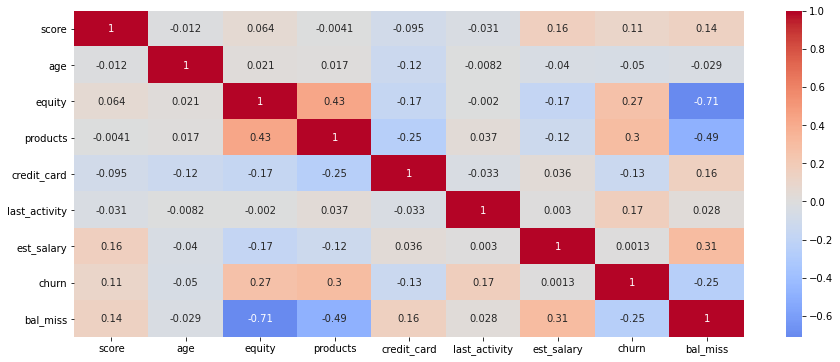

In [14]:
#создадим отдельную таблицу со столбцами, по которым нужно проверить корреляцию
miss_correlation = data[['score', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'bal_miss']]
plt.figure(figsize=(15, 6))
sns.heatmap(miss_correlation.corr(), annot=True, center=0, cmap='coolwarm')
plt.show()

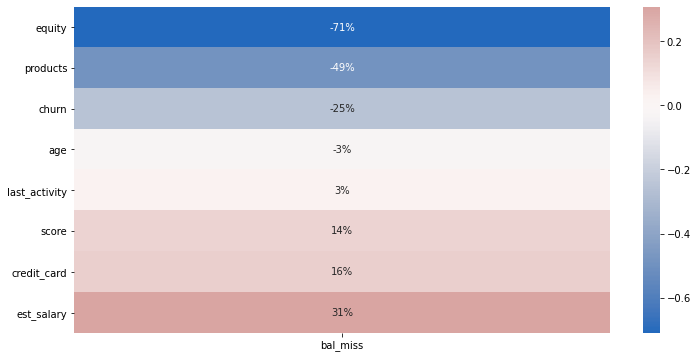

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    miss_correlation.corr().loc[:, ['bal_miss']].drop('bal_miss').sort_values('bal_miss'), 
    annot=True, fmt=".0%", cmap="vlag", center=0)
plt.show()

В столбце *age* всего 26 пропусков, это 0.3% от всех данных. Возможно, клиенты не указывали возраст при заполнении анкеты, сотрудник банка не внес полную информацию или пропуски появились по технической причине. Эти пропуски можно классифицировать как MAR и удалить.  
Со столбцом *balance* ситуация несколько иная: пропусков здесь 2295, а это 23% от всех данных. В данном случае скорее виноват технический фактор, сбой мог произойти как на этапе загрузки и на этапе выгрузки данных, так и из-за неправильного запроса или объединения таблиц.  
Положительная корреляция между пропусками и значениями столбца с доходом прослеживается, но слабая - 31% по шкале Чеддока, еще слабее зависимость со значениями столбца с данными по наличию и отсутствию кредитной карты (16%) и кредитного рейтинга (14%).  
Но, также есть и высокая отрицательная корреляция с баллами оценки собственности - 71% по шкале Чеддока, и умеренная отрицательная корреляция с количеством продуктов - 49%.  
Зависимость между пропусками и значениямидругих столбцов не неблюдается.  
Пропуски можно классифицировать как MNAR, их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям, придется их оставить, чтобы не искажать результаты дальнейшего анализа.

In [16]:
data = data.dropna(subset= ['age'])
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
bal_miss            0
dtype: int64

### Работа с дубликатами 

In [17]:
#посчитаем явные дубликаты 
data.duplicated().sum()

0

Явных дубликатов нет, проверим неявные

In [18]:
#поищем дубликаты по идентификатору пользователя
data.duplicated(subset=['user_id']).sum()

50

In [19]:
#выведем таблицу с дубликатами по идентификатору пользователя
id_duplicates = data[data.duplicated(subset=['user_id'], keep=False)].sort_values(by='user_id') 
id_duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,bal_miss
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0,1
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1,0
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0,1
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.00,Рыбинск,Ж,74.00,5,1294285.39,3,1,0,95606.80,0,0
2597,226719,990.00,Ярославль,М,37.00,4,14648692.14,2,0,0,934412.61,1,0
4216,226719,903.00,Рыбинск,Ж,63.00,0,NaN,1,1,0,138582.58,0,1
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1,0


У нас есть 50 неявных дубликатов. По большей части это разные клиенты из разных городов под одним и тем же идентификатором, но клиенты с идентификатором 227795 имеют практически идентичный кредитный рейтинг, оба мужчины, обоим 34 года, одинаковые баллы оценки собственности, не сильно различающийся баланс и доход. Возможно, это один и тот же клиент с одним и тем же идентификатором, но зарегистрированный в разных городах (например, переехал из Рыбинска в областной центр). Среди дубликатов могут встречаться и другие подобные клиенты.
50 значений из 9974 - это меньше 1%, они не повлияют на результаты исследования, значит их можно удалить. 

In [20]:
#удалим дубликаты
data = data.drop_duplicates(subset=['user_id'])
#проверим
data.duplicated(subset=['user_id']).sum()

0

Проверим уникальные значения по столбцам

In [21]:
print(data['city'].unique())
print('Уникальных значений: ', data['city'].nunique())

['Рыбинск' 'Ярославль' 'Ростов']
Уникальных значений:  3


In [22]:
print(data['gender'].unique())
print('Уникальных значений: ', data['gender'].nunique())

['Ж' 'М']
Уникальных значений:  2


In [23]:
print(data['equity'].unique())
print('Уникальных значений: ', data['equity'].nunique())

[1 5 0 4 3 2 6 7 8 9]
Уникальных значений:  10


In [24]:
print(data['products'].unique())
print('Уникальных значений: ', data['products'].nunique())

[2 3 1 4 5 0]
Уникальных значений:  6


Интересный момент: у кого-то из клиентов в графе с количеством продуктов стоит ноль, но ведь такого не может быть - у любого клиента банка должен быть хоть один продукт.

In [25]:
#найдем у кого из клиентов ноль продуктов
zero_prod = data.query('products == 0')
zero_prod

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,bal_miss
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,1


Только у одного клиента 0 продуктов. Удалим его, т.к. без продуктов банка он не является клиентом банка.

In [26]:
data = data.query('products > 0')
print(data['products'].unique())
print('Уникальных значений: ', data['products'].nunique())

[2 3 1 4 5]
Уникальных значений:  5


Нулевых значений больше нет, можно продолжить проверку по другим столбцам.

In [27]:
print(data['credit_card'].unique())
print('Уникальных значений: ', data['credit_card'].nunique())

[0 1]
Уникальных значений:  2


In [28]:
print(data['last_activity'].unique())
print('Уникальных значений: ', data['last_activity'].nunique())

[1 0]
Уникальных значений:  2


In [29]:
print(data['churn'].unique())
print('Уникальных значений: ', data['churn'].nunique())

[1 0]
Уникальных значений:  2


In [30]:
#проверим изменения и сохранение данных после срезов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
 12  bal_miss       9923 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.1+ MB


### Изменение типов данных

In [31]:
#изменим типы данных
data['score'] = data['score'].astype('int64')
data['age'] = data['age'].astype('int64')
data['credit_card'] = data['credit_card'].astype('bool')
data['last_activity'] = data['last_activity'].astype('bool')
data['churn'] = data['churn'].astype('bool')

In [32]:
#проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int64  
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   bool   
 9   last_activity  9923 non-null   bool   
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   bool   
 12  bal_miss       9923 non-null   int64  
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 881.8+ KB


### Кодирование данных

Для того, чтобы позже отследить корреляцию, нам нужно закодировать категориальные неупорядоченные переменные (столбцы с городом и полом клиентов). Чтобы при этом не потерять оригинальные столбцы, сделаем их копии и используем параметр columns (чтобы перекодированию подверглись только те столбцы, которые нам нужно перекодировать). 

In [33]:
#создадим копии столбцов 
data['city_dum'] = data['city']
data['gender_dum'] = data['gender']
#выведем первые пять строк таблицы для проверки
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,bal_miss,city_dum,gender_dum
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,1,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,Ярославль,М


In [34]:
#закодируем столбцы с помощью метода get_dummies()
data = pd.get_dummies(data, columns = ['city_dum', 'gender_dum'])
#переименуем столбцы
data = data.rename(columns={'city_dum_Ростов': 'rostov', 'city_dum_Рыбинск': 'rybinsk', 'city_dum_Ярославль': 'yaroslavl', 
                            'gender_dum_Ж': 'female', 'gender_dum_М': 'male'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,bal_miss,rostov,rybinsk,yaroslavl,female,male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,0,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,1,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,0,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,0,0,1,0,1


Данные закодированы успешно, можно переходить к следующему этапу анализа. 

### Выводы

In [35]:
#выведем общую информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int64  
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   bool   
 9   last_activity  9923 non-null   bool   
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   bool   
 12  bal_miss       9923 non-null   int64  
 13  rostov         9923 non-null   uint8  
 14  rybinsk        9923 non-null   uint8  
 15  yaroslavl      9923 non-null   uint8  
 16  female         9923 non-null   uint8  
 17  male           9923 non-null   uint8  
dtypes: bool(

На этапе предобработки данных мы изменили названия столбцов, проанализировали и устранили (где это возможно) пропуски, проверили данные на наличие дубликатов, изменили некоторые типы данных и провели кодирование для дальнейшего изучения корреляции на этапе исследовательского анализа данных. На данном этапе в датафрейме представлено 9923 строки и 18 столбцов.

## Исследовательский анализ данных

### Сравнение портретов клиентов (по средним или медианным)

In [36]:
#выведем таблицу с описанием данных
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].describe()

,score,age,equity,balance,products,est_salary
count,9923.00,9923.00,9923.00,7664.00,9923.00,9923.00
mean,848.72,42.73,2.63,828206.27,1.87,147892.55
std,65.39,12.17,1.98,1984121.61,0.79,139359.86
min,642.00,18.00,0.00,0.00,1.00,2546.30
25%,802.00,33.00,0.00,295526.57,1.00,75255.86
50%,853.00,40.00,3.00,524927.74,2.00,119719.33
75%,900.00,51.00,4.00,980753.67,2.00,174673.28
max,1000.00,86.00,9.00,119113552.01,5.00,1395064.45


In [37]:
#узнаем процент отточных клиентов по датафрейму
round(data['churn'].mean(), 2)

0.18

In [38]:
#выведем моду по полу клиентов
data['gender'].mode()

0    М
dtype: object

In [39]:
#выведем моду по городу
data['city'].mode()

0    Ярославль
dtype: object

**Среднестатистический клиент** Метанпромбанка - мужчина в возрасте около 40 лет из Ярославля имеет около 850 баллов кредитного скоринга и 3 балла оценки собственности, пользуется 2 продуктами банка, имеет баланс от 500 000 до 800 000 и ежемесячный доход от 119 000 до 148 000. 

In [40]:
#создадим срезы с данными по остающимся и уходящим клиентам 
client_stay = data.query('churn == 0') #остающиеся
client_leave = data.query('churn == 1') #уходящие

In [41]:
#выведем таблицу с описанием данных по остающимся клиентам
client_stay[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].describe()

,score,age,equity,balance,products,est_salary
count,8105.00,8105.00,8105.00,5858.00,8105.00,8105.00
mean,845.44,43.02,2.38,733789.92,1.76,147788.27
std,68.01,12.37,1.97,1958890.42,0.71,142792.18
min,642.00,18.00,0.00,0.00,1.00,2546.30
25%,796.00,34.00,0.00,279013.32,1.00,73489.66
50%,848.00,40.00,3.00,475382.45,2.00,118247.25
75%,900.00,51.00,4.00,853815.30,2.00,174087.83
max,1000.00,86.00,9.00,119113552.01,5.00,1395064.45


In [42]:
#выведем моду по полу остающихся клиентов
client_stay['gender'].mode()

0    Ж
dtype: object

In [43]:
#выведем моду по городу остающихся клиентов
client_stay['city'].mode()

0    Ярославль
dtype: object

**Типичный остающийся клиент** Метанпромбанка - женщина в возрасте около 40 лет из Ярославля имеет около 848 баллов кредитного скоринга и 3 балла оценки собственности, пользуется 2 продуктами банка, имеет баланс от 475 000 до 733 000 и ежемесячный доход от 118 000 до 147 000.

In [44]:
#выведем таблицу с описанием данных по уходящим клиентам
client_leave[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].describe()

,score,age,equity,balance,products,est_salary
count,1818.00,1818.00,1818.00,1806.00,1818.00,1818.00
mean,863.36,41.43,3.76,1134458.21,2.38,148357.48
std,49.58,11.14,1.59,2034445.55,0.92,122931.98
min,706.00,18.00,0.00,6.00,1.00,10880.27
25%,828.00,32.00,3.00,387482.16,2.00,83285.66
50%,866.00,39.00,4.00,783908.90,2.00,125408.88
75%,898.00,52.00,5.00,1348127.55,3.00,176017.84
max,1000.00,75.00,9.00,64866210.15,5.00,1263028.49


In [45]:
#выведем моду по полу уходящих клиентов
client_leave['gender'].mode()

0    М
dtype: object

In [46]:
#выведем моду по городу уходящих клиентов
client_leave['city'].mode()

0    Ярославль
dtype: object

**Типичный уходящий клиент** Метанпромбанка - мужчина в возрасте около 40 лет из Ярославля имеет около 865 баллов кредитного скоринга и 4 балла оценки собственности, пользуется 2 продуктами банка, имеет баланс от 783 000 до 1 134 000 и ежемесячный доход от 125 000 до 148 000.

Портрет остающегося клиента:  
женщина, около 40 лет из Ярославля, около 848 баллов кредитного скоринга, 3 балла оценки собственности, пользуется 2 продуктами банка, имеет баланс от 475 000 до 733 000 и ежемесячный доход от 118 000 до 147 000.  
Портрет уходящего клиента:  
мужчина, около 40 лет из Ярославля, около 865 баллов кредитного скоринга, 4 балла оценки собственности, пользуется 2 продуктами банка, имеет баланс от 783 000 до 1 134 000 и ежемесячный доход от 125 000 до 148 000.  
Из вышеперечисленного следует вывод, что мужчины с более высоким баллом кредитного скоринга, большим количеством объектов в собственности и более высоким балансом, уходят из банка чаще. По критериям возраста, города, количества продуктов банка и ежемесячного дохода, уходящие и остающиеся клиенты совпадают. 

### Распределения непрервных величин

Рассмотрим распределение непрервыных величин в разрезе оттока

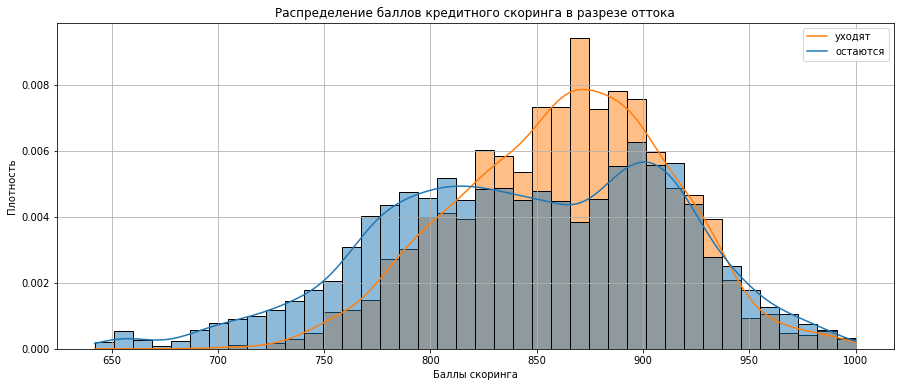

In [47]:
#создадим гистограмму по баллам скоринга
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='score', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение баллов кредитного скоринга в разрезе оттока')
plt.xlabel('Баллы скоринга')
plt.ylabel('Плотность')
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

У остающихся клиентов два пиковых значения - 810 и 900 баллов, у уходящих клиентов пик - 870 баллов, у большинства остающихся клиентов от 650 до 810 баллов, у большинства уходящих - от 830 до 900 баллов. 

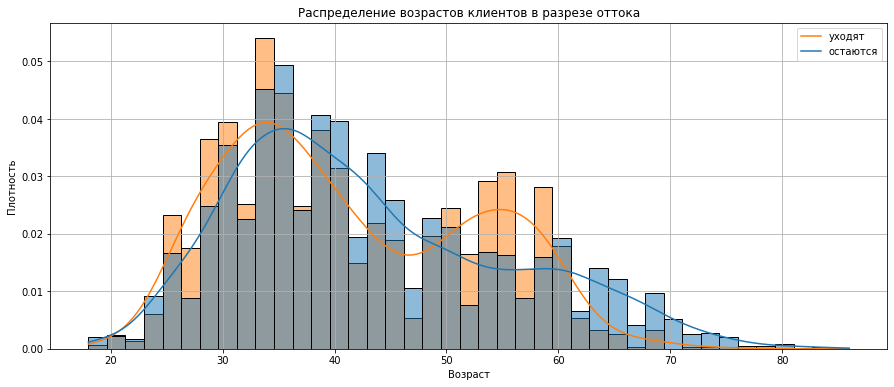

In [48]:
#создадим гистограмму по возрастам клиентов
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='age', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение возрастов клиентов в разрезе оттока')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

Большинство уходящих клиентов находятся в возрастной группе от 25 до 35 и от 50 до 60, остающихся - от 35 до 50.

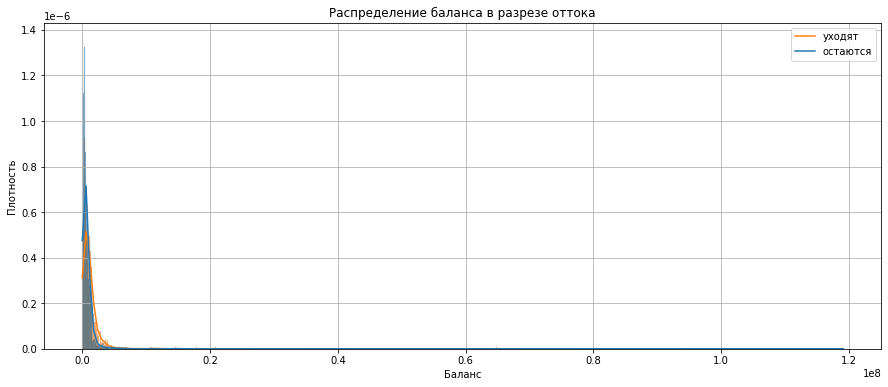

In [49]:
#создадим гистограмму по балансу
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='balance', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение баланса в разрезе оттока')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

В распределении есть выбросы, ограничим график по оси x до баланса в 3 000 000.

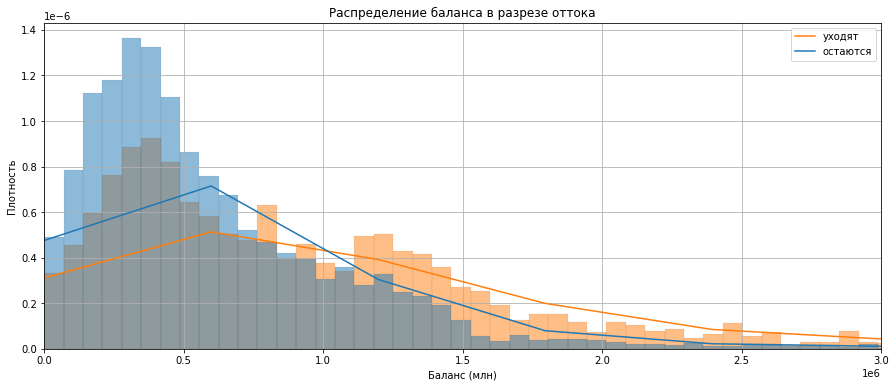

In [50]:
#создадим гистограмму по балансу
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='balance', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение баланса в разрезе оттока')
plt.xlabel('Баланс (млн)')
plt.ylabel('Плотность')
plt.xlim(0, 3000000)
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

Хвост все еще длинный, но теперь мы можем рассмотреть, что клиенты с низким балансом остаются в банке с большей вероятностью, чем клиенты с балансом выше 800 000.

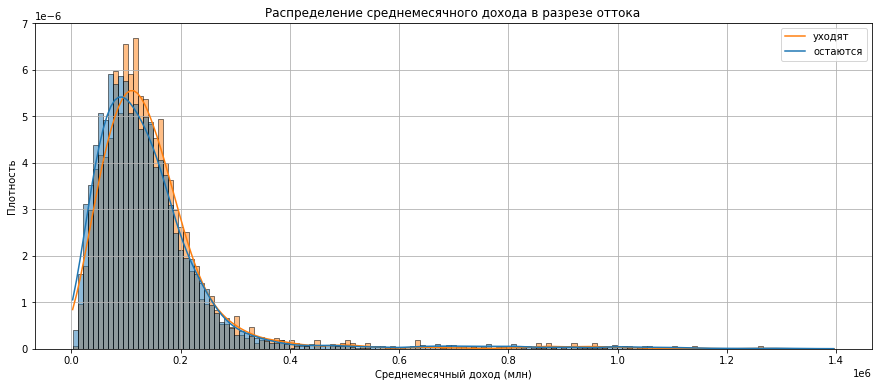

In [51]:
#создадим гистограмму по доходам
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='est_salary', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение среднемесячного дохода в разрезе оттока')
plt.xlabel('Среднемесячный доход (млн)')
plt.ylabel('Плотность')
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

Здесь также имеются выбросы, ограничим график по оси х до дохода в 500 000.

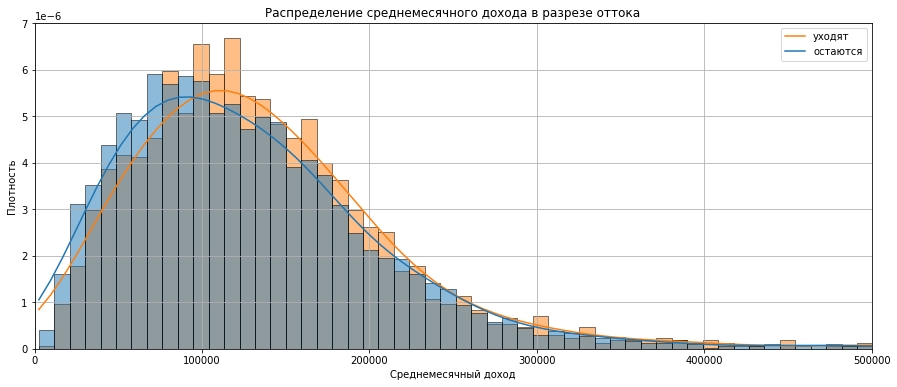

In [52]:
#создадим гистограмму по доходам
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='est_salary', hue='churn', stat='density', common_norm=False, kde=True) 
plt.title('Распределение среднемесячного дохода в разрезе оттока')
plt.xlabel('Среднемесячный доход')
plt.ylabel('Плотность')
plt.xlim(0, 500000)
plt.legend(['уходят', 'остаются'])
plt.grid()
plt.show()

Пик значений остающихся клиентов приходится на 90 000, у уходящих - на 120 000. Клиенты с балансом ниже 100 000, как правило, остаются, а клиенты с балансом выше 100 000 уходят из банка.

### Уровни оттока по категориям (по долям оттока, а не количеству)

Так как рассмотрение категориальных переменных по количеству значений может привести к некорректной трактовке результатов, используем для анализа доли оттока.

In [53]:
#создадим сводную таблицу по городам
city_churn = data.pivot_table(index = 'city', values = 'churn', aggfunc=['sum', 'count']).reset_index()
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn['share'] = city_churn['sum'] / city_churn['count'] * 100
city_churn

,city,sum,count,share
0,Ростов,265,1416,18.71
1,Рыбинск,436,2653,16.43
2,Ярославль,1117,5854,19.08


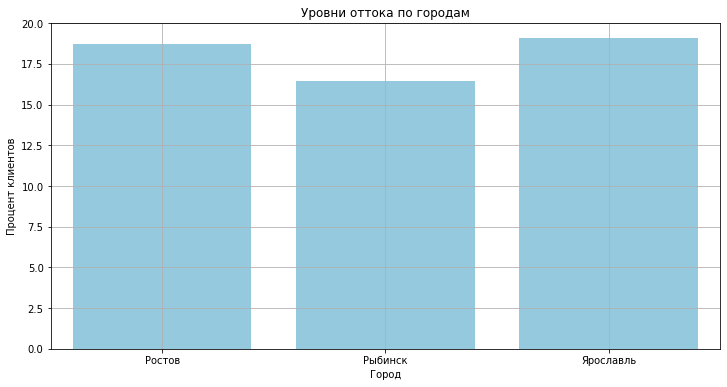

In [54]:
#создадим столбчатую диаграмму по городам
plt.figure(figsize=(12, 6))
sns.barplot(x=city_churn.city, y=city_churn.share, color='skyblue') 
plt.title('Уровни оттока по городам')
plt.xlabel('Город')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

По количеству лидирует Ярославль (как областной центр), на него приходится больше 50% анализируемых клиентов банка, но, так как мы рассматриваем доли оттока, процентное соотношение уходящих клиентов в трех городах примерно равно - в Ростове 18.71%, в Рыбинске - 16.43%, в Ярославле 19.08% от общего количества клиентов из каждого города. 

In [55]:
#создадим сводную таблицу по полу
gender_churn = data.pivot_table(index = 'gender', values = 'churn', aggfunc=['sum', 'count']).reset_index()
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn['share'] = gender_churn['sum'] / gender_churn['count'] * 100
gender_churn

,gender,sum,count,share
0,Ж,635,4952,12.82
1,М,1183,4971,23.80


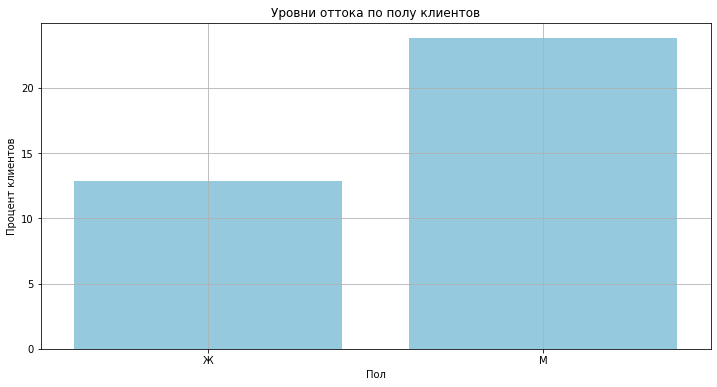

In [56]:
#создадим столбчатую диаграмму по полу
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_churn.gender, y=gender_churn.share, color='skyblue') 
plt.title('Уровни оттока по полу клиентов')
plt.xlabel('Пол')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

Всего женщин и мужчин примерно одинаковое количество, но среди уходящих клиентов процент женщин составляет 12.82% от общего числа женщин, а процент мужчин - 23.8% от общего числа мужчин. Видимо, мужчинам банк нравится меньше.

In [57]:
#создадим сводную таблицу по баллам собственности
equity_churn = data.pivot_table(index = 'equity', values = 'churn', aggfunc=['sum', 'count']).reset_index()
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn['share'] = equity_churn['sum'] / equity_churn['count'] * 100
equity_churn

,equity,sum,count,share
0,0,90,2554,3.52
1,1,93,771,12.06
2,2,166,1046,15.87
3,3,321,1531,20.97
4,4,464,1841,25.20
5,5,576,1910,30.16
6,6,58,161,36.02
7,7,37,79,46.84
8,8,6,17,35.29
9,9,7,13,53.85


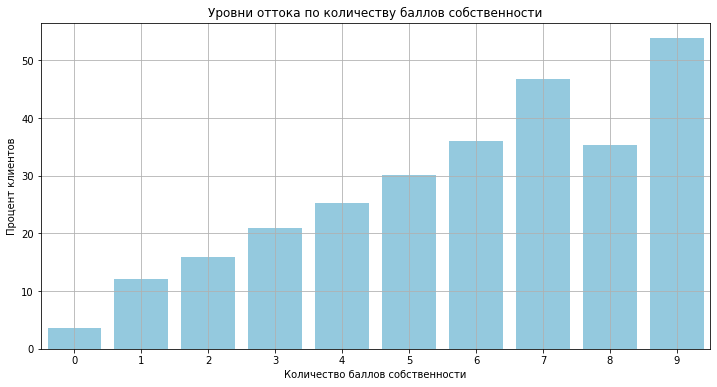

In [58]:
#создадим столбчатую диаграмму по объектам собственности
plt.figure(figsize=(12, 6))
sns.barplot(x=equity_churn.equity, y=equity_churn.share, color='skyblue') 
plt.title('Уровни оттока по количеству баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

Наглядно видно, что чем больше у клиента объектов в собственности, тем с большей вероятностью клиент окажется среди уходящих. Клиентов с 8 и 9 баллами в банке мало, но даже если не учитывать их, рост заметен.

In [59]:
#создадим сводную таблицу по количеству продуктов
products_churn = data.pivot_table(index = 'products', values = 'churn', aggfunc=['sum', 'count']).reset_index()
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn['share'] = products_churn['sum'] / products_churn['count'] * 100
products_churn

,products,sum,count,share
0,1,235,3306,7.11
1,2,978,5095,19.20
2,3,297,1029,28.86
3,4,300,474,63.29
4,5,8,19,42.11


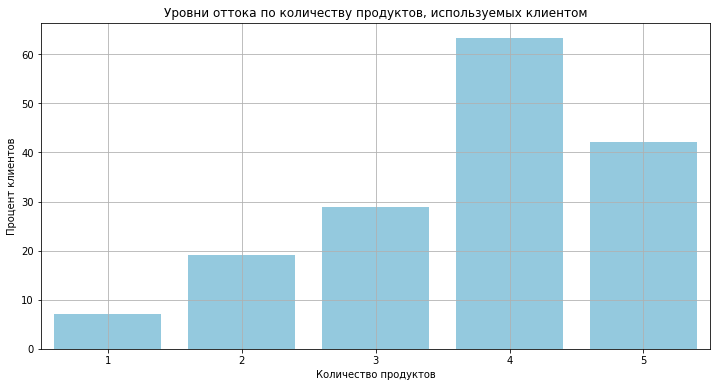

In [60]:
#создадим столбчатую диаграмму по количеству продуктов
plt.figure(figsize=(12, 6))
sns.barplot(x=products_churn.products, y=products_churn.share, color='skyblue') 
plt.title('Уровни оттока по количеству продуктов, используемых клиентом')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

И здесь видим: чем большим количеством продуктов банка пользуется клиент, тем вероятнее окажется в проценте уходящих. Больше всего уходящих клиентов с четырьмя продуктами.

In [61]:
#создадим сводную таблицу по наличию кредитной карты
card_churn = data.pivot_table(index = 'credit_card', values = 'churn', aggfunc=['sum', 'count']).reset_index()
card_churn.columns = card_churn.columns.droplevel(level=1)
card_churn['share'] = card_churn['sum'] / card_churn['count'] * 100
card_churn['credit_card'].replace({False: 'нет карты', True: 'есть карта'}, inplace=True)
card_churn

,credit_card,sum,count,share
0,нет карты,815,3175,25.67
1,есть карта,1003,6748,14.86


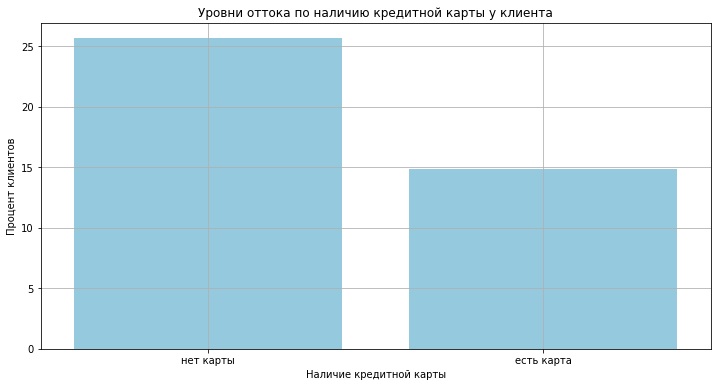

In [62]:
#создадим столбчатую диаграмму по наличию кредитной карты
plt.figure(figsize=(12, 6))
sns.barplot(x=card_churn.credit_card, y=card_churn.share, color='skyblue') 
plt.title('Уровни оттока по наличию кредитной карты у клиента')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

А вот наличие кредитной карты наоборот делает клиента более лояльным. Процент уходящих клиентов без карты 25.67%, а с картой всего 14.86%.

In [63]:
#создадим сводную таблицу по активности клиента
activity_churn = data.pivot_table(index = 'last_activity', values = 'churn', aggfunc=['sum', 'count']).reset_index()
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn['share'] = activity_churn['sum'] / activity_churn['count'] * 100
activity_churn['last_activity'].replace({False: 'неактивные', True: 'активные'}, inplace=True)
activity_churn

,last_activity,sum,count,share
0,неактивные,541,4729,11.44
1,активные,1277,5194,24.59


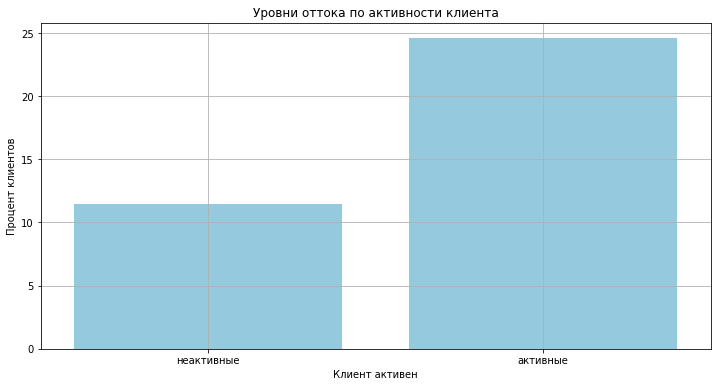

In [64]:
#создадим столбчатую диаграмму по активности клиента
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_churn.last_activity, y=activity_churn.share, color='skyblue') 
plt.title('Уровни оттока по активности клиента')
plt.xlabel('Клиент активен')
plt.ylabel('Процент клиентов')
plt.grid()
plt.show()

Процент уходящих неактивных клиентов 11.44%, а активных - 24.59%. Возможно, некоторые клиенты открывают вклады на долгий срок и не пользуются другими услугами банка, а у других клиентов по 3-4 продукта, которыми они регулярно пользуются, но остаются недовольны.

### Корреляционный анализ

Составим тепловую карту для поиска корреляции между оттоком и другими признаками.

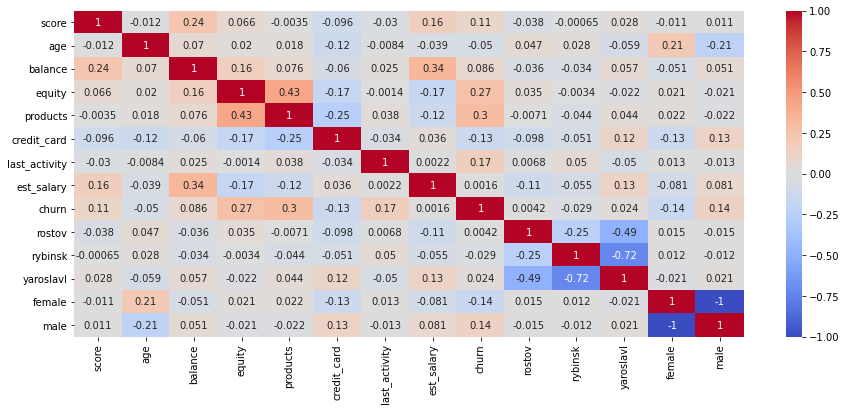

In [65]:
churn_correlation = data[['score', 'age', 'balance', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 
                          'churn', 'rostov', 'rybinsk', 'yaroslavl', 'female', 'male']]
plt.figure(figsize=(15, 6))
sns.heatmap(churn_correlation.corr(), annot=True, center=0, cmap='coolwarm')
plt.show()

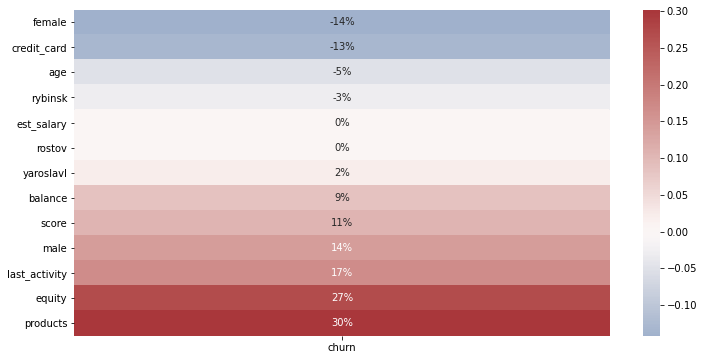

In [66]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    churn_correlation.corr().loc[:, ['churn']].drop('churn').sort_values('churn'), 
    annot=True, fmt=".0%", cmap="vlag", center=0)
plt.show()

Линейной зависимости между оттоком и другими признаками не наблюдается. Связь есть между оттоком и количеством баллов в собственности (0.27), и оттком и количеством продуктов (0.3), но коэффициент слишком низкий, т.е. в некоторых случаях зависимость будет проявляться, а в некоторых - нет.  
Есть слабая зависимость между балансом и доходом (0.34) и количеством баллов собсвтенности и количеством продуктов (0.43), но даже эти коэффициенты не близки к единице, а значит слишком низкие.

### Выводы

На этапе исследовательского анализа данных мы сравнили портреты клиентов и выяснили, что среднестатистический клиент Метанпромбанка - мужчина в возрасте около 40 лет из Ярославля имеет около 850 быллов кредитного скоринга и 3 объекта в собственности, пользуется 2 продуктами банка, имеет баланс от 500 000 до 800 000 и ежемесячный доход от 119 000 до 148 000.  
Многие величины имеют нормальное распределение, в балансе и доходах есть выбросы.  
У уходящих клиентов скоринговый балл от 830 до 900, возраст от 25 до 35 и от 50 до 60, баланс 800000 и выше, среднемесячный доход около 120000. В Ярославле и Ростове доля уходящих клиентов выше (19.08% и 18.71% соответственно), мужчины (23.9%) уходят чаще, чем женщины (12.82%), также чаще уходят клиенты с большим числом объектов собственности (46.84% с семью объектами) и используемых продуктов (63.29% с четырьмя продуктами). Наличие кредитной карты положительно влияет на лояльность клиентов: процент уходящих клиентов без карты 25.67%, а с картой - 14.86%. Процент уходящих неактивных клиентов 11.44%, а активных - 24.59%.  
Линейной зависимости между оттоком и другими признаками не наблюдается. 

## Статистический анализ данных

Подготовим данные для проверки гипотез

In [67]:
#создадим срезы с данными по остающимся и уходящим клиентам 
churn_0 = data.query('churn == 0') #остающиеся
churn_1 = data.query('churn == 1') #уходящие

### Проверка гипотезы о различии дохода между клиентами, которые ушли и клиентами, которые остались

Нулевая гипотеза: средние доходы оставшихся и уходящих клиентов равны.   
Альтернативная гипотеза: средние доходы оставшихся и уходящих клиентов не равны.   

Для проверки распределения на нормальность применим критерий Шапиро-Уилка.

In [68]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn_0['est_salary'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [69]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn_1['est_salary'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Оба распределения не нормальны. Проверим размеры и дисперсии выборок.

In [70]:
print('Размер выборки остающихся клиентов: ', len(churn_0['est_salary']))
print('Размер выборки уходящих клиентов: ', len(churn_1['est_salary']))

print('Дисперсия выборки остающихся клиентов: ', churn_0['est_salary'].var())
print('Дисперсия выборки уходящих клиентов: ', churn_1['est_salary'].var())

Размер выборки остающихся клиентов:  8105
Размер выборки уходящих клиентов:  1818
Дисперсия выборки остающихся клиентов:  20389608052.585316
Дисперсия выборки уходящих клиентов:  15112272166.883385


Используем t-test для двух независимых выборок и укажем equal_var=False, т.к. дисперсии не равны. Не нормальное распределение - не проблема для t-test, т.к. центральная предельная теорема гласит, что выборочные средние будут нормально распределены вокруг настоящего среднего генеральной совокупности (а пропорции, взятые из выборок - вокруг пропорции). Это верно и для распределений, содержащих сильные выбросы. 

In [71]:
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.ttest_ind (
    churn_0['est_salary'],
    churn_1['est_salary'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8626784591490475
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не была отвергнута, следовательно, средние доходы оставшихся и уходящих клиентов равны.

Проверим эту же гипотезу, используя u-критерий Манна-Уитни

In [72]:
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.mannwhitneyu(
    churn_0['est_salary'],
    churn_1['est_salary'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00020329119363804673
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, следовательно, средние доходы оставшихся и уходящих клиентов не равны.

Значения тестов расходятся, ограничим выбросы в данных и проведем тесты снова. 

In [73]:
#выведем числовое описание данных по остающимся клиентам
churn_0['est_salary'].describe()

count       8105.00
mean      147788.27
std       142792.18
min         2546.30
25%        73489.66
50%       118247.25
75%       174087.83
max      1395064.45
Name: est_salary, dtype: float64

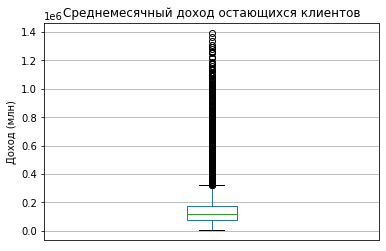

In [74]:
#выведем диаграмму размаха
churn_0.boxplot('est_salary') 
plt.title('Среднемесячный доход остающихся клиентов')
plt.ylabel('Доход (млн)')
plt.xticks([])
plt.show()

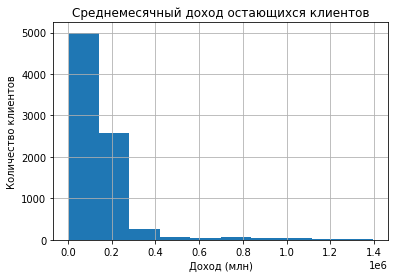

In [75]:
#выведем гистограмму
churn_0.hist('est_salary')
plt.title('Среднемесячный доход остающихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Доход (млн)')
plt.show()

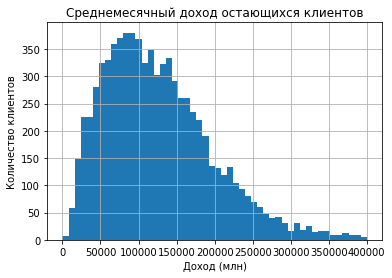

In [76]:
#выведем еще одну гистограмму, увеличив число корзин, и ограничив график по оси x
churn_0.hist('est_salary', bins=50, range= (0, 400000))
plt.title('Среднемесячный доход остающихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Доход (млн)')
plt.show()

Максимальное значение по описанию данных - 1 395 064. По диаграмме размаха и гистограмме видно, что выбросы начинаются на 300 000. Создадим срез, установив 300 000 верхним порогом дохода.

In [77]:
churn_0 = churn_0.query('est_salary <= 300000')
#проверим срез
churn_0['est_salary'].describe()

count      7639.00
mean     120566.64
std       63356.27
min        2546.30
25%       71194.62
50%      112870.32
75%      162594.21
max      299874.88
Name: est_salary, dtype: float64

Проделаем то же самое для уходящих клиентов

In [78]:
#выведем числовое описание данных по уходящим клиентам
churn_1['est_salary'].describe()

count       1818.00
mean      148357.48
std       122931.98
min        10880.27
25%        83285.66
50%       125408.88
75%       176017.84
max      1263028.49
Name: est_salary, dtype: float64

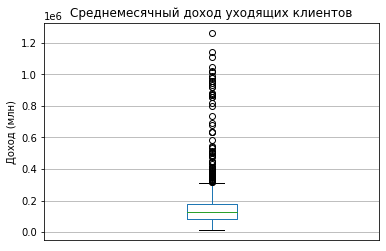

In [79]:
#выведем диаграмму размаха
churn_1.boxplot('est_salary') 
plt.title('Среднемесячный доход уходящих клиентов')
plt.ylabel('Доход (млн)')
plt.xticks([])
plt.show()

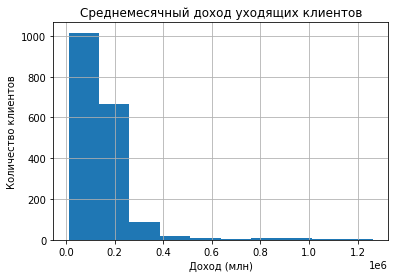

In [80]:
#выведем гистограмму
churn_1.hist('est_salary')
plt.title('Среднемесячный доход уходящих клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Доход (млн)')
plt.show()

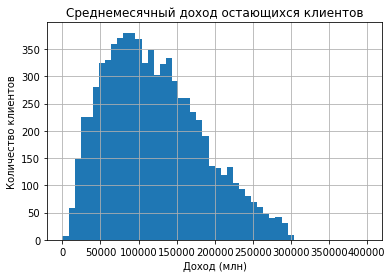

In [81]:
#выведем еще одну гистограмму, увеличив число корзин, и ограничив график по оси x
churn_0.hist('est_salary', bins=50, range= (0, 400000))
plt.title('Среднемесячный доход остающихся клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Доход (млн)')
plt.show()

Максимальное значение по уходящим клиентам тоже выбивается - 1 263 028. Выбросов здесь меньше (потому что и данных меньше), но они тоже начинаются на 300 000. Создадим срез, установив 300 000 верхним порогом дохода.

In [82]:
churn_1 = churn_1.query('est_salary <= 300000')
#проверим срез
churn_1['est_salary'].describe()

count      1723.00
mean     127069.08
std       60648.51
min       10880.27
25%       81131.40
50%      120738.70
75%      167733.58
max      299904.85
Name: est_salary, dtype: float64

Выбросы устранены.

Проверим гипотезу еще раз, используя t-test.

In [83]:
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.ttest_ind (
    churn_0['est_salary'],
    churn_1['est_salary'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.881336485143691e-05
Отвергаем нулевую гипотезу


Проверим гипотезу еще раз, используя u-критерий Манна-Уитни.

In [84]:
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.mannwhitneyu(
    churn_0['est_salary'],
    churn_1['est_salary'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.412679590267084e-06
Отвергаем нулевую гипотезу


В обоих случаях нулевая гипотеза отвергается, следовательно, средние доходы оставшихся и уходящих клиентов не равны.  
При не нормальном распределении следует использовать непараметрический тест Манна-Уитни даже для больших выборок, т.к. выбросы сильно сдвигают параметрические результаты. 

### Проверка гипотезы о различии возраста между клиентами, которые ушли и клиентами, которые остались

Нулевая гипотеза: средний возраст оставшихся и уходящих клиентов равен.   
Альтернативная гипотеза: средний возраст оставшихся и уходящих клиентов не равен.   

Для проверки распределения на нормальность применим критерий Шапиро-Уилка.

In [85]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn_0['age'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  4.705560243202736e-42
Отвергаем нулевую гипотезу: распределение не нормально


In [86]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn_1['age'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  2.0084480688461104e-23
Отвергаем нулевую гипотезу: распределение не нормально


И здесь распределения не нормальны. Проверим размеры и дисперсии выборок.

In [87]:
print('Размер выборки остающихся клиентов: ', len(churn_0['age']))
print('Размер выборки уходящих клиентов: ', len(churn_1['age']))

print('Дисперсия выборки остающихся клиентов: ', churn_0['age'].var())
print('Дисперсия выборки уходящих клиентов: ', churn_1['age'].var())

Размер выборки остающихся клиентов:  7639
Размер выборки уходящих клиентов:  1723
Дисперсия выборки остающихся клиентов:  155.73854077940538
Дисперсия выборки уходящих клиентов:  125.80033340006727


Проверим гипотезу, используя u-критерий Манна-Уитни.

In [88]:
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.mannwhitneyu(
    churn_0['age'],
    churn_1['age'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0158340550268624e-05
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, следовательно, средний возраст оставшихся и уходящих клиентов не равен.

### Выводы

По итогам проведенного статистического анализа данных было проверено две гипотезы:  
1. Гипотеза о равенстве средних доходов оставшихся и уходящих клиентов не подтвердилась. Различия в среднем возрасте между оставшимися и отточными клиентами имеют статистическую значимость. 
2. Гипотеза о равенстве средних возрастов оставшихся и уходящих клиентов не подтвердилась. Различия в среднем возрасте между оставшимися и отточными клиентами имеют статистическую значимость. 

## Сегментация клиентов

По результатам проведенного исследования можем провести сегментацию клиентов.  
Средний процент уходящих клиентов 18%, нам нужно сегментировать клиентов по критериям превышающим среднебанковский, а в самих сегментах отток должен быть более, чем в 2 раза выше среднего по банку. В сегмент должны войти от 300 до 2000 клиентов.    
Большинство уходящих клиентов:  
+ 830-900 баллов скоринга;  
+ 25-35 или 50-60 лет;  
+ баланс 800 000 и выше;  
+ доход 120 000 и выше;  
+ из Ярославля или Ростова;  
+ мужчины;  
+ 3-9 баллов оценки собственности;  
+ 3-5 продуктов банка;  
+ без кредитки;  
+ активные.

### Выделить сегменты пользователей (по 2-3 критерия)

Сегмент 1: с 830-900 баллами скоринга, в возрасте 25-35 лет и без кредитной карты.  
Сегмент 2: 50-60 лет с балансом 800 000 и выше и баллами собственности 3-9.  
Сегмент 3: мужчины с доходом от 100 000 до 250 000 и 3-5 продуктами.  
Сегмент 4: активные пользователи из Ярославля с балансом от 500 000 до 1 000 000.  
Сегмент 5: клиенты с баллами скоринга выше 800 и 3-5 продуктами.

### Посчитать размер и отток сегментов

Выделим **сегмент 1** с 830-900 баллами скоринга, в возрасте 25-35 лет и без кредитной карты

In [89]:
segment_1 = data.query('(830 <= score <= 900) and (25 <= age <= 35) and (credit_card == 0)')
segment_1_churn = round(sum(segment_1['churn']) / len(segment_1) * 100, 2)
print('Клиентов в сегменте 1: ', len(segment_1))
print('Процент оттока в сегменте 1: ', segment_1_churn)

Клиентов в сегменте 1:  353
Процент оттока в сегменте 1:  43.91


Выделим **сегмент 2** в 50-60 лет с балансом 800 000 и выше и баллами собственности 3-9

In [90]:
segment_2 = data.query('(50 <= age <= 60) and (balance >= 800000) and (equity >= 3)')
segment_2_churn = round(sum(segment_2['churn']) / len(segment_2) * 100, 2)
print('Клиентов в сегменте 2: ', len(segment_2))
print('Процент оттока в сегменте 2: ', segment_2_churn)

Клиентов в сегменте 2:  536
Процент оттока в сегменте 2:  45.34


Выделим **сегмент 3** мужчин с доходом от 100 000 до 250 000 и 3-5 продуктами

In [91]:
segment_3 = data.query('(male == 1) and (100000 <= est_salary <= 250000) and (products >= 3)')
segment_3_churn = round(sum(segment_3['churn']) / len(segment_3) * 100, 2)
print('Клиентов в сегменте 3: ', len(segment_3))
print('Процент оттока в сегменте 3: ', segment_3_churn)

Клиентов в сегменте 3:  357
Процент оттока в сегменте 3:  57.14


Выделим **сегмент 4** активных пользователей из Ярославля с балансом от 500 000 до 1 000 000

In [92]:
segment_4 = data.query('(yaroslavl == 1) and (500000 <= balance <= 1000000) and (last_activity == True)')
segment_4_churn = round(sum(segment_4['churn']) / len(segment_4) * 100, 2)
print('Клиентов в сегменте 4: ', len(segment_4))
print('Процент оттока в сегменте 4: ', segment_4_churn)

Клиентов в сегменте 4:  595
Процент оттока в сегменте 4:  37.14


Выделим **сегмент 5** клиенты с баллами скоринга от 800 и 3-5 продуктами

In [93]:
segment_5 = data.query('(score >= 800) and (products >= 3)')
segment_5_churn = round(sum(segment_5['churn']) / len(segment_5) * 100, 2)
print('Клиентов в сегменте 5: ', len(segment_5))
print('Процент оттока в сегменте 5: ', segment_5_churn)

Клиентов в сегменте 5:  1197
Процент оттока в сегменте 5:  43.78


### Приоритизировать сегменты

В первую очередь берем в работу **сегмент 3** - мужчин с доходом от 100 000 до 250 000 и 3-5 продуктами, он небольшой, 357 клиентов, но отточных из них 57,14%.  
Вторым возьмем сегмент **сегмент 2** с клиентами 50-60 лет с балансом 800 000 и выше и баллами собственности 3-9, в нем 536 клиентов, из них 45.34% отточных.  
И третьим возьмем **сегмент 1** с клиентами, у которых 830-900 баллами скоринга, в возрасте 25-35 лет и без кредитной карты. Он тоже небольшой, из 353 клиентов 43.91% отточных. 

## Общий вывод и рекомендации по приоритетным сегментам

**Портрет отточного клиента**

Типичный отточный клиент:  
+ мужчина;  
+ 25-35 или 50-60 лет;  
+ из Ярославля или Ростова Великого;  
+ имеет 830-900 баллов кредитного скоринга;  
+ баланс от 800 000;  
+ доход 100 000 - 250 000;  
+ имеет 3-9 баллов оценки собственности;  
+ использует 3-5 продуктов банка;  
+ не имеет кредитной карты;  
+ активный пользователь.

**Портрет остающегося клиента**

Типичный остающийся клиент:  
+ женщина;  
+ 35-50 лет;  
+ из Рыбинска;  
+ имеет 650-810 баллов кредитного скоринга;  
+ баланс до 700 000;  
+ доход ниже 100 000;  
+ имеет 1-2 балла оценки собственности;  
+ использует 1-2 продукта банка;  
+ имеет кредитную карту;  
+ неактивный пользователь.

**Рекомендация для сегмента мужчин с доходом от 100 000 до 250 000 и 3-5 продуктами**

У данного сегмента клиентов хороший доход даже для областного центра, а, учитывая количество продуктов, которыми они пользуются, очень странно, что они хотят покинуть банк. В первую очередь стоит выяснить, в чем заключается проблема, и почему чем больше у клиента продуктов, тем вероятнее он уйдет. Возможно, с использованием каких-то продуктов возникают сложности, и необходимы разъяснения, или, наоборот, при таком количестве продуктов клиент получает слишком много уведомлений.

**Рекомендация для сегмента с клиентами 50-60 лет с балансом 800 000 и выше и баллами собственности 3-9**

Для состоятельных клиентов можно пересмотреть условия по вкладам, например, предложить более выгодные процентные ставки, автопролонгирование или снятие без потери процентов, открыть счет для бизнеса, брокерский счет или ИИС. Также для клиентов с большим количеством объектов собственности можно предложить страхование объектов по выгодным условиям (если банк предоставляет такую услугу).

**Рекомендация для сегмента с клиентами, у которых 830-900 баллами скоринга, в возрасте 25-35 лет и без кредитной карты**

Клиенты с высокими баллами скоринга, как правило, часто пользуются услугами банков и исправно вносят платежи по кредитам. Вероятно, они на хорошем счету и в Метанпромбанке, а значит, им тоже можно предложить более выгодные условия в зависимости от используемых продуктов - рефинансирование кредита или изменение условий по вкладам, а также, учитывая, что у клиентов из данного сегмента нет кредитных карт, можно заинтересовать их картами с увеличенным кредитным лимитом или увеличенным беспроцентным периодом.

## Презентация

Ссылка на презентацию: https://disk.yandex.ru/i/jiPwOlsN-y-Scg